In [84]:
import os
_ROOT_PATH = os.path.join('..', '..', '..')
_OPTIM_DIR = os.path.join(_ROOT_PATH, 'experiments', 'optim_ablation')
_FINAL_DFS_DIR = os.path.join('..', '..', 'final_dfs')

import sys
sys.path.append('..')
sys.path.append(os.path.join('..', '..', '..', 'tools'))
import plotconfig

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dbf = os.path.join(_FINAL_DFS_DIR, 'optim_ablation.parquet')
df = pd.read_parquet(dbf, engine='pyarrow')

<Axes: xlabel='number', ylabel='value'>

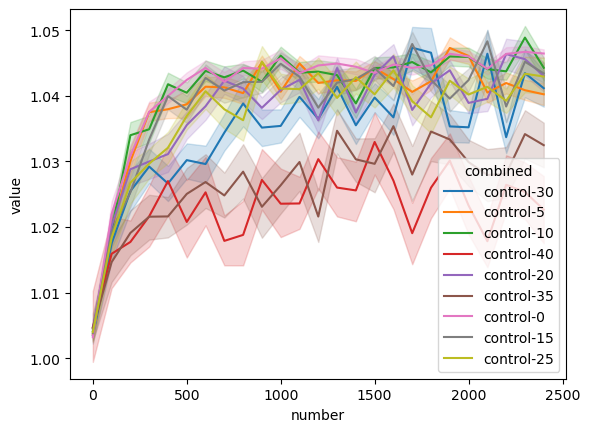

In [86]:
import seaborn as sns

df['str_ablation_distance'] = df['ablation_distance'].astype(str)
df['combined'] = df['run_type'] + '-' + df['str_ablation_distance']

# Define the interval for subsampling
interval = 100
numbers_to_keep = list(range(0, df['number'].max() + 1, interval))
subsampled_df = df[df['number'].isin(numbers_to_keep)]

# mask = ((subsampled_df['run_type'] == "ablation"))
mask = ((subsampled_df['run_type'] == "control"))
subsampled_df = subsampled_df[mask]

sns.lineplot(data=subsampled_df, x='number', y='value', hue='combined')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


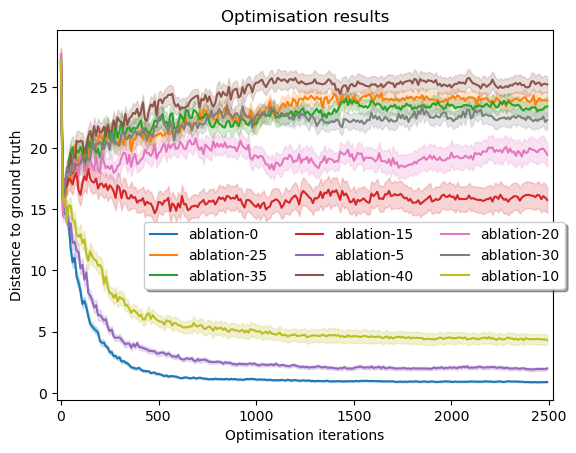

In [87]:
import seaborn as sns

# Define the interval for subsampling
interval = 10
numbers_to_keep = list(range(0, df['number'].max() + 1, interval))
subsampled_df = df[df['number'].isin(numbers_to_keep)]

mask = ((subsampled_df['run_type'] == "ablation"))
# mask = ((subsampled_df['run_type'] == "control"))
subsampled_df = subsampled_df[mask]

ax = sns.lineplot(data=subsampled_df, x='number', y='euclidean_distance', hue='combined', errorbar='se')

ax.legend(loc='upper center', bbox_to_anchor=(0.6, 0.50),
          ncol=3, fancybox=True, shadow=True)


plt.xlabel('Optimisation iterations')
plt.ylabel('Distance to ground truth')
plt.title('Optimisation results')

plt.xlim([-20, 2520])
# plt.ylim([0, 5])

# Save as high-definition
plotconfig.save_fig("optim_ablation")